In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import fashion_mnist

In [3]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [4]:
print(train_images.shape)

(60000, 28, 28)


In [5]:
train_images = train_images.reshape((60000,28,28,1))  # reshape to 4d array
train_images = train_images/255  # Normalize
train_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [6]:
test_images = test_images.reshape((10000,28,28,1))
test_images = test_images/255
test_images

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [7]:
train_labels = pd.get_dummies(train_labels)
train_labels = np.array(train_labels)
train_labels

array([[0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
test_labels = pd.get_dummies(test_labels)
test_labels = np.array(test_labels)
test_labels

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
from keras import models
from keras import Sequential
from keras import layers
from keras import regularizers
from keras.optimizers import Adam
from keras.layers import Dense,Conv2D,Dropout , Flatten ,MaxPooling2D

# MODEL_1

In [1]:
model_1 = models.Sequential()
model_1.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (28,28,1 ) ))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Flatten())
model_1.add(Dense(32 , activation='relu'))
model_1.add(Dense(10 , activation='softmax'))

NameError: name 'Sequential' is not defined

In [11]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
__________________________________________________

In [12]:
model_1.compile(optimizer='adam' , metrics = ['accuracy'] , loss = ['categorical_crossentropy'])

In [13]:
history = model_1.fit(train_images , train_labels , epochs = 10 , batch_size = 128 ,validation_split=0.25)

Epoch 1/10
352/352 [==============================] - 6s 9ms/step - loss: 0.5837 - accuracy: 0.7946 - val_loss: 0.4110 - val_accuracy: 0.8559
Epoch 2/10
352/352 [==============================] - 3s 8ms/step - loss: 0.3801 - accuracy: 0.8678 - val_loss: 0.3583 - val_accuracy: 0.8744
Epoch 3/10
352/352 [==============================] - 3s 8ms/step - loss: 0.3344 - accuracy: 0.8821 - val_loss: 0.3461 - val_accuracy: 0.8771
Epoch 4/10
352/352 [==============================] - 3s 9ms/step - loss: 0.3051 - accuracy: 0.8926 - val_loss: 0.3167 - val_accuracy: 0.8882
Epoch 5/10
352/352 [==============================] - 3s 8ms/step - loss: 0.2861 - accuracy: 0.9000 - val_loss: 0.3083 - val_accuracy: 0.8912
Epoch 6/10
352/352 [==============================] - 3s 9ms/step - loss: 0.2678 - accuracy: 0.9050 - val_loss: 0.2983 - val_accuracy: 0.8969
Epoch 7/10
352/352 [==============================] - 3s 8ms/step - loss: 0.2549 - accuracy: 0.9102 - val_loss: 0.2883 - val_accuracy: 0.8997
Epoch 

In [14]:
model_1.evaluate(train_images,train_labels)
#training score

1875/1875 [==============================] - 12s 6ms/step - loss: 0.2237 - accuracy: 0.9213


[0.22369384765625, 0.9212666749954224]

In [15]:
model_1.evaluate(test_images,test_labels)
#testing score

313/313 [==============================] - 2s 7ms/step - loss: 0.2929 - accuracy: 0.8983


[0.2929072678089142, 0.8982999920845032]

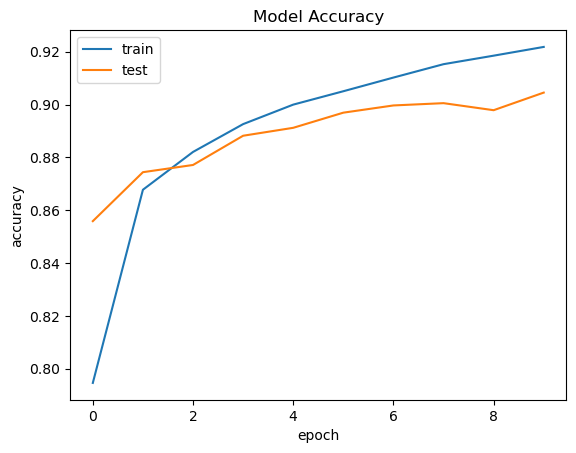

In [16]:
#model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

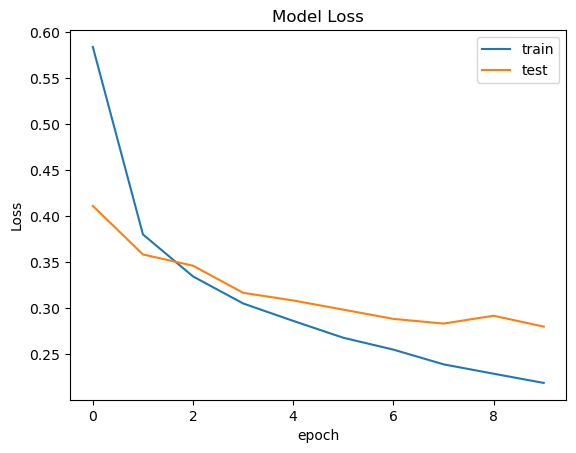

In [17]:
# model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Model is Overfitted

# Model_2
increasing epochs

In [18]:
model_2 = models.Sequential()
model_2.add(Conv2D(32 , kernel_size=(3,3) , activation='relu' , input_shape = (28,28,1)))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Flatten())
model_2.add(Dense(32 , activation='relu' ))
model_2.add(Dense(10 , activation='softmax'))

In [19]:
model_2.compile(optimizer='adam' , loss = ['categorical_crossentropy'] , metrics = ['accuracy'])

In [20]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                173088    
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
________________________________________________

In [21]:
history = model_2.fit(train_images , train_labels ,batch_size=128 ,epochs = 30 ,verbose = 0 ,validation_split= 0.2 )

In [22]:
#training score
model_2.evaluate(train_images , train_labels)

1875/1875 [==============================] - 13s 7ms/step - loss: 0.1024 - accuracy: 0.9729


[0.10237159579992294, 0.9728833436965942]

In [23]:
#testing score
model_2.evaluate(test_images , test_labels)

313/313 [==============================] - 2s 8ms/step - loss: 0.3665 - accuracy: 0.9094


[0.3665098249912262, 0.9093999862670898]

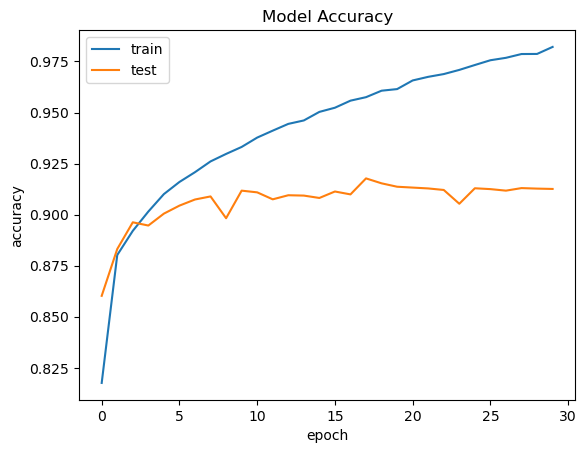

In [24]:
# model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

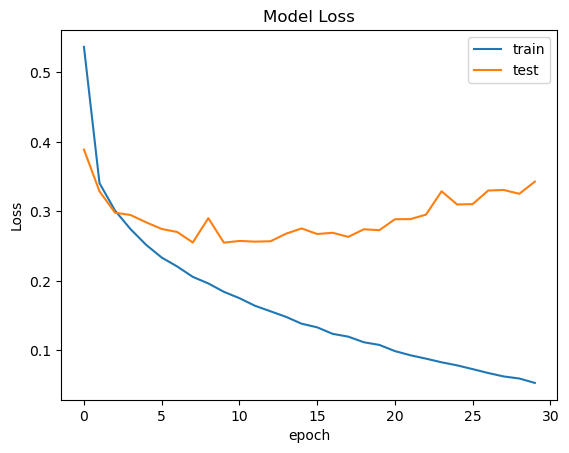

In [25]:
# model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Model_2 is overfitted

# Model_3
20 epochs and 2 conv layers

In [26]:

# model building
model_3 = models.Sequential()


model_3.add(Conv2D(32 , kernel_size=(3,3) , activation='relu' , input_shape = (28,28,1)))
model_3.add(MaxPooling2D(pool_size=(2,2)))


model_3.add(Conv2D(16 , kernel_size=(2,2),activation='relu' ))
model_3.add(MaxPooling2D(pool_size=(2,2)))

model_3.add(Flatten())
model_3.add(Dense(32 , activation='relu' ))
model_3.add(Dense(10 , activation='softmax'))





# model_compile
model_3.compile(optimizer='adam' , loss = 'categorical_crossentropy' , metrics = 'accuracy')

# model summary
print("*"*100)
print(model_3.summary())
print(""*100)

# fitting
history = model_3.fit(train_images , train_labels , validation_split= 0.2 ,batch_size=128 ,epochs = 20 ,verbose = 0 )


# training score
train_score = model_3.evaluate(train_images , train_labels)
print("\n","train score = ",train_score ,"\n" , "*"*100)

# testing score
test_score = model_3.evaluate(test_images , test_labels)
print("\n","test score = ",test_score ,"\n" , "*"*100)








****************************************************************************************************
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 16)        2064      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 576)               0         
                   

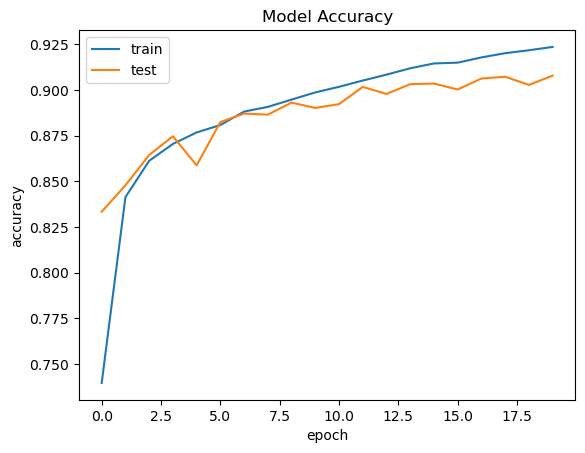

In [27]:
# model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

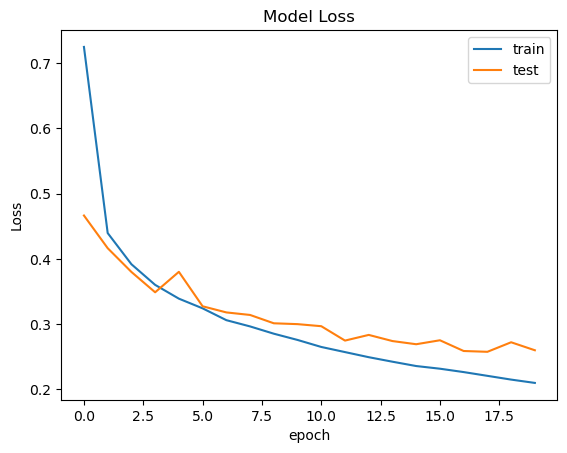

In [28]:
# model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Model_4
50 epochs and 2 conv layers

In [29]:

# model building
model_4 = models.Sequential()


model_4.add(Conv2D(196 , kernel_size=(3,3) , activation='relu' , input_shape = (28,28,1)))
model_4.add(MaxPooling2D(pool_size=(2,2)))


model_4.add(Conv2D(49 , kernel_size=(2,2),activation='relu' ))
model_4.add(MaxPooling2D(pool_size=(2,2)))

model_4.add(Flatten())
model_4.add(Dense(25 , activation='relu' ))
model_4.add(Dense(10 , activation='softmax'))





# model_compile
model_4.compile(optimizer='adam' , loss = ['categorical_crossentropy'] , metrics = 'accuracy' ,)

# model summary
print("*"*100)
print(model_4.summary())
print(""*100)

# fitting
history = model_4.fit(train_images , train_labels , validation_split= 0.2 ,batch_size=128 ,epochs = 50 ,verbose = 1 )


# training score
train_score = model_4.evaluate(train_images , train_labels)
print("\n","train score = ",train_score ,"\n" , "*"*100)

# testing score
test_score = model_4.evaluate(test_images , test_labels)
print("\n","test score = ",test_score ,"\n" , "*"*100)



****************************************************************************************************
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 196)       1960      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 196)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 49)        38465     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 49)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1764)              0         
                   

Epoch 47/50
375/375 [==============================] - 7s 18ms/step - loss: 0.0443 - accuracy: 0.9845 - val_loss: 0.4836 - val_accuracy: 0.9092
Epoch 48/50
375/375 [==============================] - 7s 17ms/step - loss: 0.0392 - accuracy: 0.9863 - val_loss: 0.5079 - val_accuracy: 0.9061
Epoch 49/50
375/375 [==============================] - 7s 18ms/step - loss: 0.0366 - accuracy: 0.9868 - val_loss: 0.4965 - val_accuracy: 0.9103
Epoch 50/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1840 - accuracy: 0.9560

 train score =  [0.18401135504245758, 0.9559500217437744] 
 ****************************************************************************************************
313/313 [==============================] - 3s 8ms/step - loss: 0.6222 - accuracy: 0.8938

 test score =  [0.6221799850463867, 0.8938000202178955] 
 ****************************************************************************************************


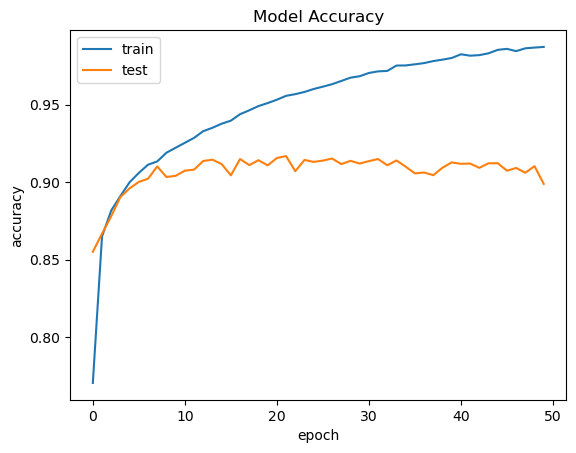

In [30]:
# model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

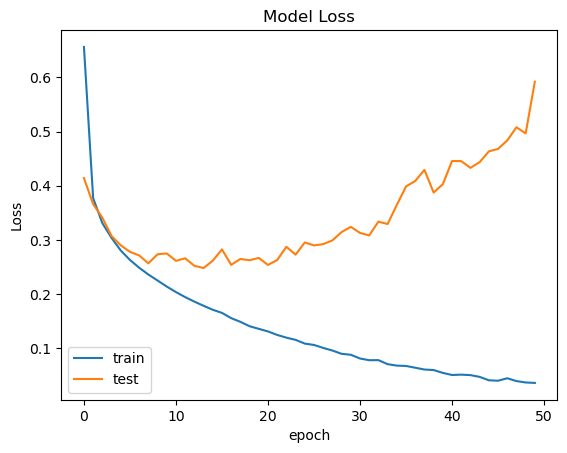

In [31]:
# model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Model_3 performs better so lets choose model_3 and apply regularization on it

In [32]:

# model building
model_3 = models.Sequential()


model_3.add(Conv2D(32 , kernel_size=(3,3) , activation='relu' , input_shape = (28,28,1),kernel_regularizer=regularizers.L1L2(0.001,0.001)))
model_3.add(MaxPooling2D(pool_size=(2,2)))


model_3.add(Conv2D(16 , kernel_size=(2,2),activation='relu' ))
model_3.add(MaxPooling2D(pool_size=(2,2)))

model_3.add(Flatten())
model_3.add(Dense(32 , activation='relu' ))
model_3.add(Dense(10 , activation='softmax'))





# model_compile
model_3.compile(optimizer='adam' , loss = 'categorical_crossentropy' , metrics = 'accuracy')

# model summary
print("*"*100)
print(model_3.summary())
print(""*100)

# fitting
history = model_3.fit(train_images , train_labels , validation_split= 0.2 ,batch_size=128 ,epochs = 20 ,verbose = 1 )


# training score
train_score = model_3.evaluate(train_images , train_labels)
print("\n","train score = ",train_score ,"\n" , "*"*100)

# testing score
test_score = model_3.evaluate(test_images , test_labels)
print("\n","test score = ",test_score ,"\n" , "*"*100)








****************************************************************************************************
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 16)        2064      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 576)               0         
                   

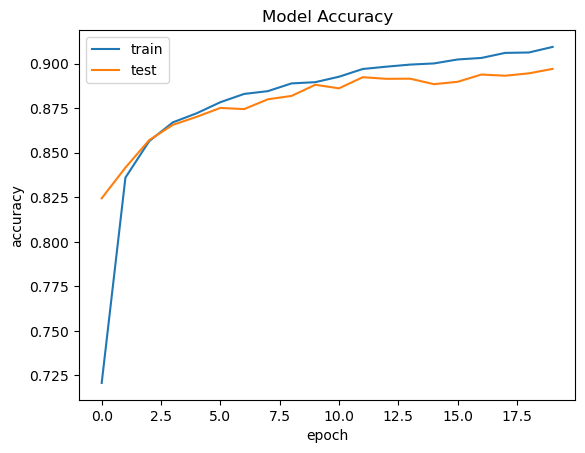

In [33]:
# model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

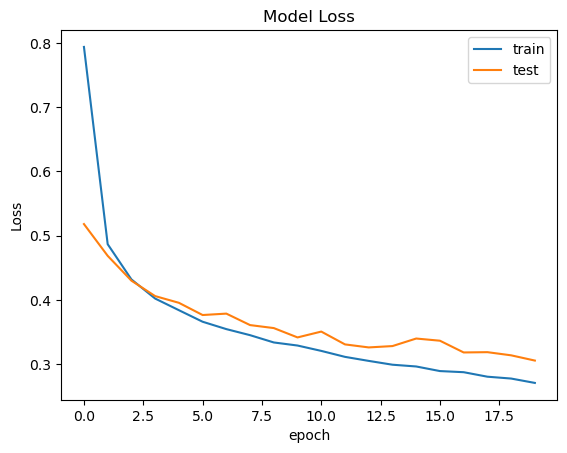

In [34]:
# model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [35]:
pred = model_3.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [36]:
def check(x):
    for i in test_labels[x]:
        i = round(i)
        print(i," ",end="")
    
    print("\n")

    for i in pred[x]:
        i = round(i)
        print(i," ",end="")

        
        
        

In [49]:
for x in range(len(pred)):
    for i in test_labels[x]:
        i = round(i)
        print(i," ",end="")
    
    print("\n")

    for i in pred[x]:
        i = round(i)
        print(i," ",end="")
        
    print("\n")
    print("*"*100)


0  0  0  0  0  0  0  0  0  1  

0  0  0  0  0  0  0  0  0  1  

****************************************************************************************************
0  0  1  0  0  0  0  0  0  0  

0  0  1  0  0  0  0  0  0  0  

****************************************************************************************************
0  1  0  0  0  0  0  0  0  0  

0  1  0  0  0  0  0  0  0  0  

****************************************************************************************************
0  1  0  0  0  0  0  0  0  0  

0  1  0  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  0  1  0  0  0  

0  0  0  0  0  0  1  0  0  0  

****************************************************************************************************
0  1  0  0  0  0  0  0  0  0  

0  1  0  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  0

0  0  0  1  0  0  0  0  0  0  

0  0  0  1  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  1  0  0  0  0  

0  0  0  0  0  1  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  1  0  0  0  0  

0  0  0  0  0  1  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  0  1  0  0  0  

0  0  0  0  0  0  1  0  0  0  

****************************************************************************************************
1  0  0  0  0  0  0  0  0  0  

0  0  0  0  1  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  1  0  0  0  0  

0  0  0  0  0  1  0  0  0  0  

****************************************************************************************************
0  0  0  0

0  1  0  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  0  0  1  0  0  

0  0  0  0  0  0  0  1  0  0  

****************************************************************************************************
0  0  0  1  0  0  0  0  0  0  

0  0  0  1  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  0  0  0  1  0  

0  0  0  0  0  0  0  0  1  0  

****************************************************************************************************
0  0  0  0  0  0  0  1  0  0  

0  0  0  0  0  0  0  1  0  0  

****************************************************************************************************
0  0  1  0  0  0  0  0  0  0  

0  0  1  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  1  0  0  0  0  0  0  0  

0  0  1  0

0  0  0  0  0  0  0  1  0  0  

0  0  0  0  0  0  0  1  0  0  

****************************************************************************************************
0  0  0  0  0  0  0  0  1  0  

0  0  0  0  0  0  0  0  1  0  

****************************************************************************************************
0  0  0  0  0  0  0  1  0  0  

0  0  0  0  0  0  0  1  0  0  

****************************************************************************************************
0  0  0  0  0  1  0  0  0  0  

0  0  0  0  0  1  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  0  0  0  0  1  

0  0  0  0  0  0  0  0  0  1  

****************************************************************************************************
0  0  0  0  0  1  0  0  0  0  

0  0  0  0  0  1  0  0  0  0  

****************************************************************************************************
0  0  0  0

0  0  0  0  0  0  1  0  0  0  

****************************************************************************************************
0  0  1  0  0  0  0  0  0  0  

0  0  1  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  0  1  0  0  0  

1  0  0  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  0  0  0  1  0  

0  0  0  0  0  0  0  0  1  0  

****************************************************************************************************
0  0  0  0  1  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  1  0  0  0  0  0  0  0  

0  0  1  0  0  0  0  0  0  0  

****************************************************************************************************
0  1  0  0  0  0  0  0  0  0  

0  1  0  0

0  0  0  0  1  0  0  0  0  0  

0  0  0  0  1  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  0  0  0  0  1  

0  0  0  0  0  0  0  0  0  1  

****************************************************************************************************
0  1  0  0  0  0  0  0  0  0  

0  1  0  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  0  0  0  0  1  

0  0  0  0  0  0  0  0  0  1  

****************************************************************************************************
0  0  0  0  1  0  0  0  0  0  

0  0  0  0  1  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  0  0  1  0  0  

0  0  0  0  0  0  0  1  0  0  

****************************************************************************************************
0  0  0  1

0  0  1  0  0  0  0  0  0  0  

0  0  1  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  0  0  0  1  0  

0  0  0  0  0  0  0  0  1  0  

****************************************************************************************************
0  0  0  0  0  0  1  0  0  0  

0  0  0  0  0  0  1  0  0  0  

****************************************************************************************************
0  1  0  0  0  0  0  0  0  0  

0  1  0  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  0  0  0  1  0  

0  0  0  0  0  0  0  0  1  0  

****************************************************************************************************
0  0  0  0  1  0  0  0  0  0  

0  0  0  0  1  0  0  0  0  0  

****************************************************************************************************
0  0  0  0

0  1  0  0  0  0  0  0  0  0  

0  1  0  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  1  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  1  0  0  0  0  0  0  

0  0  0  1  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  0  0  0  0  1  

0  0  0  0  0  0  0  0  0  1  

****************************************************************************************************
0  0  0  0  1  0  0  0  0  0  

0  0  0  0  1  0  0  0  0  0  

****************************************************************************************************
1  0  0  0  0  0  0  0  0  0  

1  0  0  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  1

0  0  0  0  0  0  0  0  0  0  

****************************************************************************************************
0  1  0  0  0  0  0  0  0  0  

0  1  0  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  0  0  0  0  1  

0  0  0  0  0  0  0  0  0  1  

****************************************************************************************************
0  0  0  0  0  0  0  0  1  0  

0  0  0  0  0  0  0  0  1  0  

****************************************************************************************************
0  0  0  0  0  0  1  0  0  0  

0  0  0  0  0  0  1  0  0  0  

****************************************************************************************************
0  0  0  1  0  0  0  0  0  0  

0  0  0  1  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  0  0  1  0  0  

0  0  0  0

0  0  1  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  1  0  0  0  0  

0  0  0  0  0  1  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  0  0  0  0  1  

0  0  0  0  0  0  0  0  0  1  

****************************************************************************************************
0  0  0  1  0  0  0  0  0  0  

0  0  0  1  0  0  0  0  0  0  

****************************************************************************************************
0  1  0  0  0  0  0  0  0  0  

0  1  0  0  0  0  0  0  0  0  

****************************************************************************************************
0  0  0  0  0  0  0  0  1  0  

0  0  0  0  0  0  0  1  0  0  

****************************************************************************************************
0  1  0  0  0  0  0  0  0  0  

0  1  0  0